In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Columnas y tipo de datos
columns = [
    # nominal
    'gender', #0-1
    'symptoms', #0-1
    'alcohol', #0-1
    'hepatitis b surface antigen', #0-1
    'hepatitis b e antigen', #0-1
    'hepatitis b core antibody', #0-1
    'hepatitis c virus antibody', #0-1
    'cirrhosis', #0-1
    'endemic countries', #0-1
    'smoking', #0-1
    'diabetes', #0-1
    'obesity', #0-1
    'hemochromatosis', #0-1
    'arterial hypertension', #0-1
    'chronic renal insufficiency', #0-1
    'human immunodeficiency virus', #0-1
    'nonalcoholic steatohepatitis', #0-1
    'esophageal varices', #0-1
    'splenomegaly', #0-1
    'portal hypertension', #0-1
    'portal vein thrombosis', #0-1
    'liver metastasis', #0-1
    'radiological hallmark', #0-1
    
    # integer
    'age', # age at diagnosis
    
    # continuous
    'grams of alcohol per day',
    'packs of cigarets per year',
    
    # ordinal
    'performance status',
    'encephalopathy degree',
    'ascites degree',
     
    # continuous   
    'international normalised ratio',
    'alpha-fetoprotein',
    'haemoglobin',
    'mean corpuscular volume',
    'leukocytes',
    'platelets',
    'albumin',
    'total bilirubin',
    'alanine transaminase',
    'aspartate transaminase',
    'gamma glutamyl transferase',
    'alkaline phosphatase',
    'total proteins',
    'creatinine',
    
    # integer
    'number of nodules',
    
    # continuous
    'major dimension of nodule cm',
    'direct bilirubin mg/dL',
    'iron',
    'oxygen saturation %',
    'ferritin',
        
    #nominal
    'survive', #0-1
]

columns = list([x.replace(' ', '_').strip() for x in columns])

In [3]:
# Lectura de datos
df = pd.read_csv('/content/hcc-data.csv', names = columns, header = None, na_values = ['?'])
df.head(3)

,gender,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,...,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survive
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,150.0,7.1,0.7,1.0,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,7.0,2.1,5.0,13.0,0.1,28.0,6.0,16.0,1


In [4]:
df['age'].describe()

count    165.000000
mean      64.690909
std       13.319534
min       20.000000
25%       57.000000
50%       66.000000
75%       74.000000
max       93.000000
Name: age, dtype: float64

In [5]:
df.shape

(165, 50)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          165 non-null    int64  
 1   symptoms                        147 non-null    float64
 2   alcohol                         165 non-null    int64  
 3   hepatitis_b_surface_antigen     148 non-null    float64
 4   hepatitis_b_e_antigen           126 non-null    float64
 5   hepatitis_b_core_antibody       141 non-null    float64
 6   hepatitis_c_virus_antibody      156 non-null    float64
 7   cirrhosis                       165 non-null    int64  
 8   endemic_countries               126 non-null    float64
 9   smoking                         124 non-null    float64
 10  diabetes                        162 non-null    float64
 11  obesity                         155 non-null    float64
 12  hemochromatosis                 142 

In [7]:
( df.isnull().sum() / 164 ) * 100

gender                             0.000000
symptoms                          10.975610
alcohol                            0.000000
hepatitis_b_surface_antigen       10.365854
hepatitis_b_e_antigen             23.780488
hepatitis_b_core_antibody         14.634146
hepatitis_c_virus_antibody         5.487805
cirrhosis                          0.000000
endemic_countries                 23.780488
smoking                           25.000000
diabetes                           1.829268
obesity                            6.097561
hemochromatosis                   14.024390
arterial_hypertension              1.829268
chronic_renal_insufficiency        1.219512
human_immunodeficiency_virus       8.536585
nonalcoholic_steatohepatitis      13.414634
esophageal_varices                31.707317
splenomegaly                       9.146341
portal_hypertension                6.707317
portal_vein_thrombosis             1.829268
liver_metastasis                   2.439024
radiological_hallmark           

Existe una gran cantidad de datos nulos, se eliminaron las columnas con un 50% de datos nulos

In [8]:
df.drop(['iron', 'oxygen_saturation_%', 'ferritin', 'esophageal_varices', 'packs_of_cigarets_per_year', 'grams_of_alcohol_per_day', 'direct_bilirubin_mg/dL'], axis = 1, inplace = True)

# Nominales

In [9]:
nominal = [
               # nominal
    'gender', #0-1
    'symptoms', #0-1
    'alcohol', #0-1
    'hepatitis b surface antigen', #0-1
    'hepatitis b e antigen', #0-1
    'hepatitis b core antibody', #0-1
    'hepatitis c virus antibody', #0-1
    'cirrhosis', #0-1
    'endemic countries', #0-1
    'smoking', #0-1
    'diabetes', #0-1
    'obesity', #0-1
    'hemochromatosis', #0-1
    'arterial hypertension', #0-1
    'chronic renal insufficiency', #0-1
    'human immunodeficiency virus', #0-1
    'nonalcoholic steatohepatitis', #0-1
    # 'esophageal varices', #0-1
    'splenomegaly', #0-1
    'portal hypertension', #0-1
    'portal vein thrombosis', #0-1
    'liver metastasis', #0-1
    'radiological hallmark', #0-1
]

nominal = list([x.replace(' ', '_').strip() for x in nominal])



[
 'hepatitis_b_e_antigen',
 'portal_vein_thrombosis',
 'liver_metastasis']


In [10]:
nom = df[[ 'hepatitis_b_e_antigen', 'portal_vein_thrombosis', 'liver_metastasis', 'survive']]


[Text(0, 0, 'liver_metastasis'),
 Text(0, 0, 'hepatitis_b_e_antigen'),
 Text(0, 0, 'portal_vein_thrombosis')]

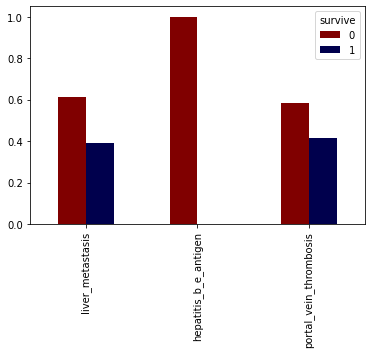

In [11]:
nom[nom['hepatitis_b_e_antigen'] == 1]
nom[nom['portal_vein_thrombosis'] == 1]
nom[nom['liver_metastasis'] == 1]

l = pd.crosstab(index = nom[nom['liver_metastasis'] == 1]['liver_metastasis'], columns = nom['survive']).apply(lambda r: r/r.sum(), axis=1).reset_index().drop('liver_metastasis', axis = 1)
p = pd.crosstab(index = nom[nom['portal_vein_thrombosis'] == 1]['portal_vein_thrombosis'], columns = nom['survive']).apply(lambda r: r/r.sum(), axis=1).reset_index().drop('portal_vein_thrombosis', axis = 1)
h = pd.crosstab(index = nom[nom['hepatitis_b_e_antigen'] == 1]['hepatitis_b_e_antigen'], columns = nom['survive']).apply(lambda r: r/r.sum(), axis=1).reset_index().drop('hepatitis_b_e_antigen', axis = 1)

l['value'] = 'liver_metastasis'
h['value'] = 'hepatitis_b_e_antigen'
p['value'] = 'portal_vein_thrombosis'

ax = pd.concat([l, h, p], axis = 0).plot(kind = 'bar', cmap = 'seismic_r')
ax.set_xticklabels(['liver_metastasis', 'hepatitis_b_e_antigen', 'portal_vein_thrombosis'])

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


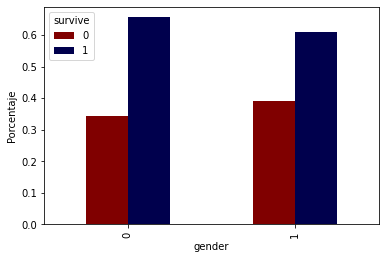

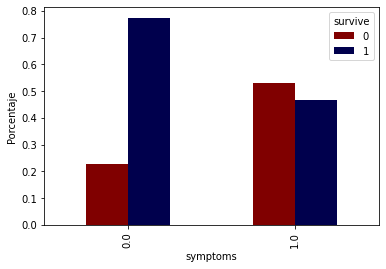

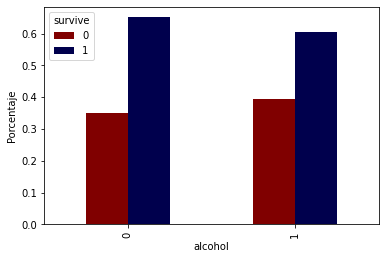

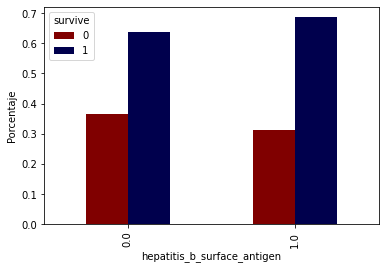

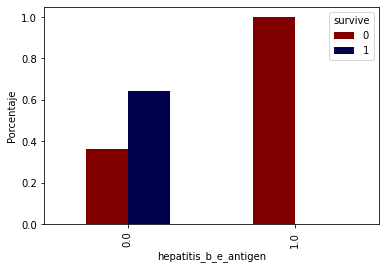

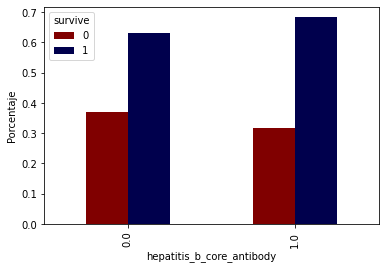

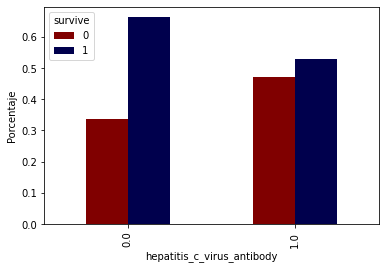

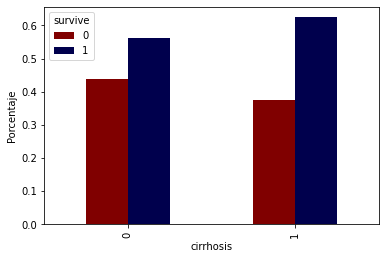

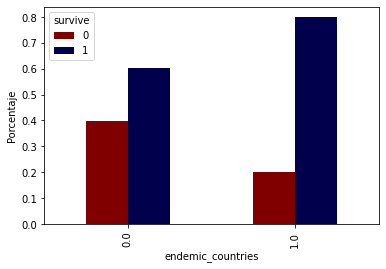

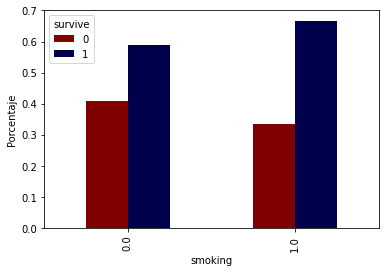

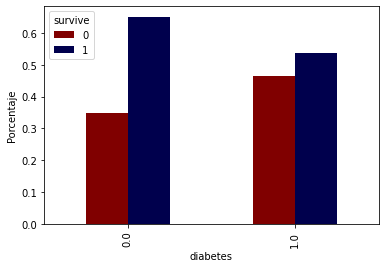

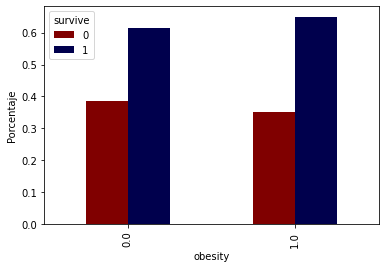

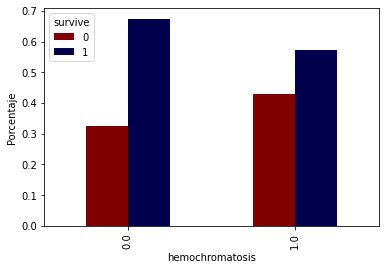

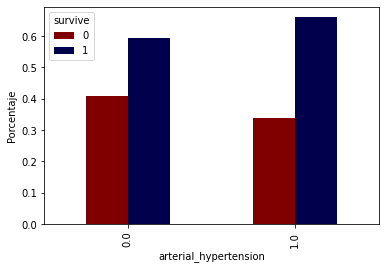

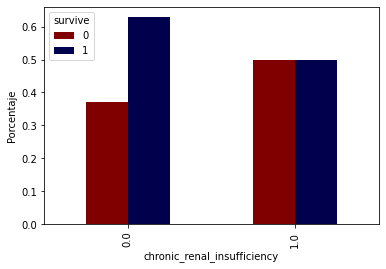

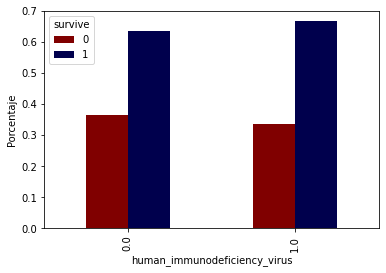

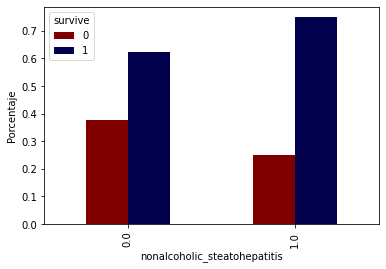

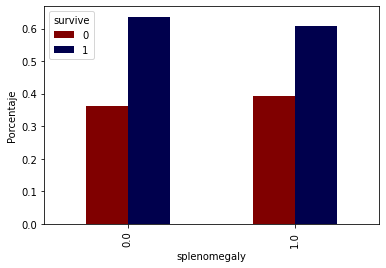

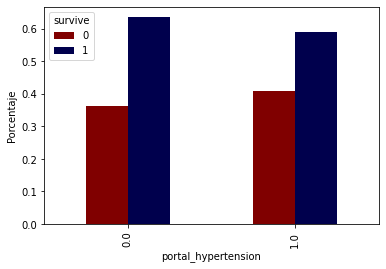

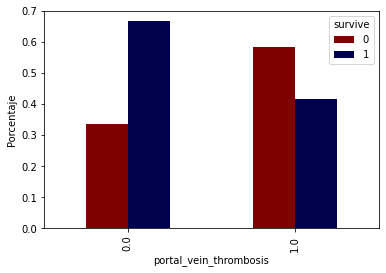

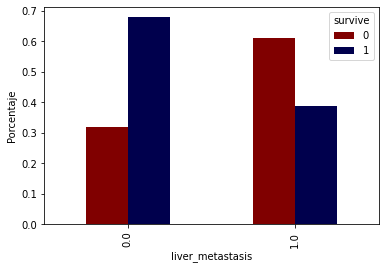

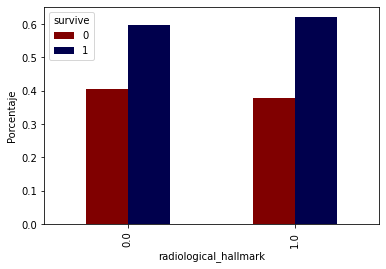

In [12]:
for column in nominal:
  pd.crosstab(index = df[column], columns = df['survive']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar', cmap = 'seismic_r')
  plt.ylabel('Porcentaje')

De los hombres (1) el 60% sobrevive mientras que de las mujeres cerca del 65% sobrevive.

In [13]:
# Tratamiento de datos nulos para la columnas nominales
for column in nominal:
  df[column] = df[column].fillna( df[column].mode()[0] )

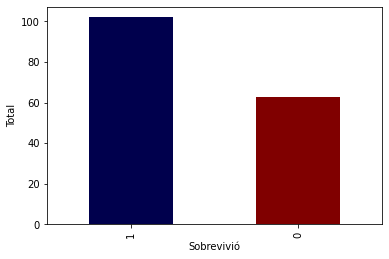

In [14]:
df['survive'].value_counts().plot(kind = 'bar', color = ['#00004D', '#800000'])
plt.xlabel('Sobrevivió')
plt.ylabel('Total')
plt.show()

In [15]:
df['survive'].value_counts() / sum(df['survive'].value_counts())

1    0.618182
0    0.381818
Name: survive, dtype: float64

# Ordinal

In [16]:
ordinal = ['performance status',
    'encephalopathy degree',
    'ascites degree']
    
ordinal = list([x.replace(' ', '_').strip() for x in ordinal])

In [17]:
for column in ordinal:
  df[column] = df[column].astype('category', errors = 'ignore')

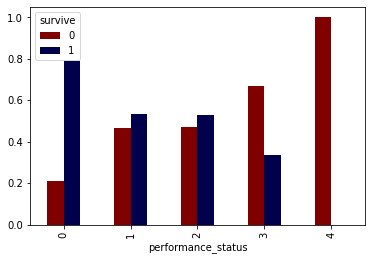

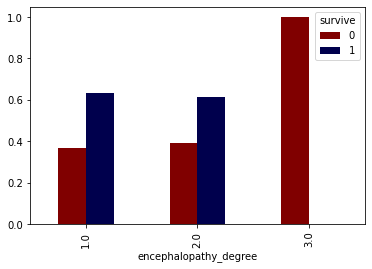

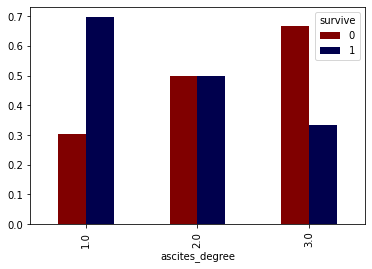

In [18]:
for column in ordinal:
  pd.crosstab(index = df[column], columns = df['survive']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar', cmap = 'seismic_r')

In [19]:
for column in ordinal:
  #df_aux = df[column].value_counts().to_frame().reset_index()
#
  #df[column] = df[column].fillna( df_aux[df_aux[column] == max(df_aux[column])]['index'][0] )
  df[column] = df[column].fillna( df[column].mode()[0] )

# Integer

In [20]:
integer = ['age', 'number_of_nodules']

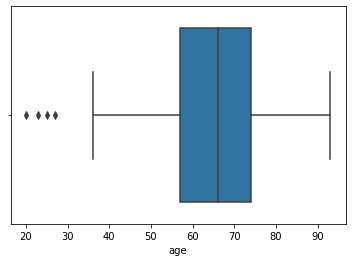

In [21]:
sns.boxplot(x = 'age', data = df)
plt.show()

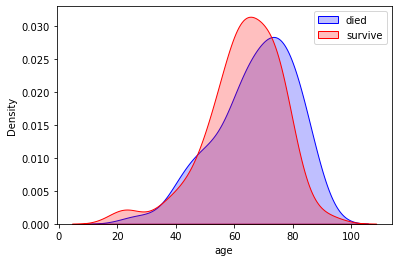

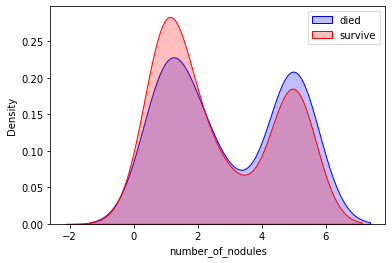

In [22]:
for column in integer:
  ax = sns.kdeplot(df[df['survive'] == 0][column], color = 'blue', shade = True )
  ax = sns.kdeplot(df[df['survive'] == 1][column], ax = ax, color = 'red', shade = True )
  ax.legend(['died', 'survive'])
  plt.show()

In [23]:
df[['age', 'number_of_nodules']].isnull().sum()

age                  0
number_of_nodules    2
dtype: int64

In [24]:
# Transformando a categorica
df['young_old'] = df['age'].apply(lambda x: 'young' if x <= 65 else 'old')

In [25]:
# Tratamiento de datos nulos para number of nodules
# df['number_of_nodules'] = df['number_of_nodules'].fillna( df['number_of_nodules'].value_counts().to_frame().reset_index().max()[0] )
df['number_of_nodules'] = df['number_of_nodules'].fillna( df['number_of_nodules'].mode()[0] )

In [26]:
df['number_of_nodules'].isna().sum()

0

In [27]:
def nodules(x):
  if x <= 2:
    return 'leatest_2'
  elif (x > 2) & (x <=4):
    return 'between_2_4'
  elif x > 4:
    return 'greater_4'


In [28]:
# Transformando a categorica
df['nodules'] = df['number_of_nodules'].apply(nodules)

# Numeric

In [29]:
numeric = [
    
    # 'packs of cigarets per year',
           # continuous   
    'international normalised ratio',
    'alpha-fetoprotein',
    'haemoglobin',
    'mean corpuscular volume',
    'leukocytes',
    'platelets',
    'albumin',
    'total bilirubin',
    'alanine transaminase',
    'aspartate transaminase',
    'gamma glutamyl transferase',
    'alkaline phosphatase',
    'total proteins',
    'creatinine',
    
   
    # continuous
    'major dimension of nodule cm'
]

numeric = list([x.replace(' ', '_').strip() for x in numeric])

['international_normalised_ratio',
 'alpha-fetoprotein',
 'haemoglobin',
 'mean_corpuscular_volume',
 'leukocytes',
 'platelets',
 'albumin',
 'total_bilirubin',
 'alanine_transaminase',
 'aspartate_transaminase',
 'gamma_glutamyl_transferase',
 'alkaline_phosphatase',
 'total_proteins',
 'creatinine',
 'major_dimension_of_nodule_cm']

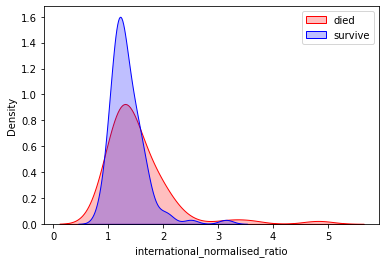

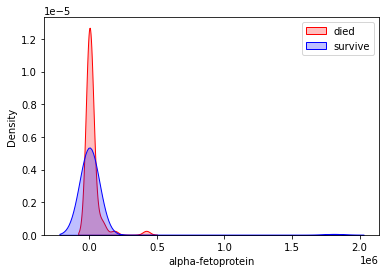

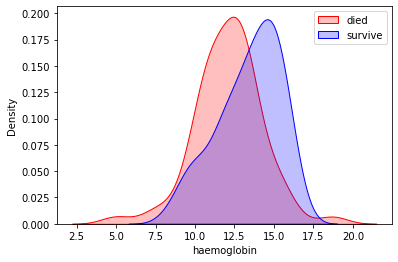

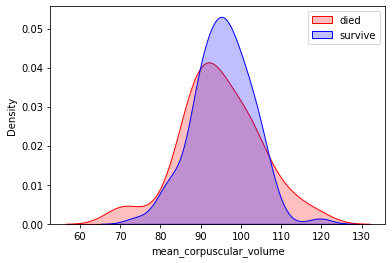

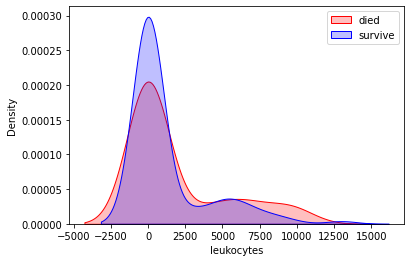

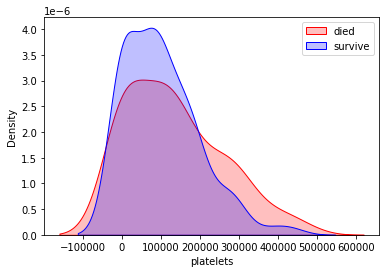

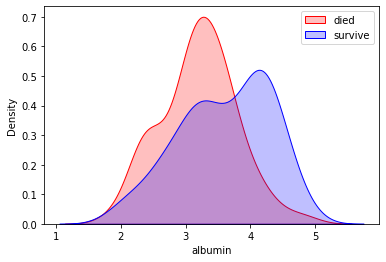

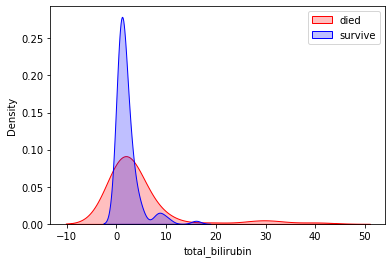

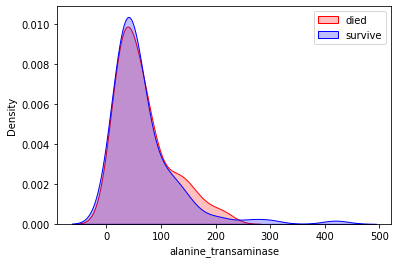

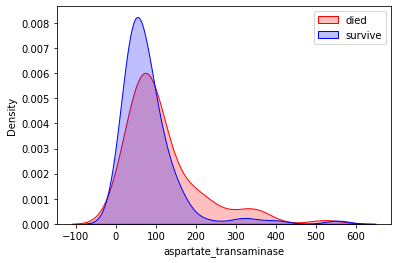

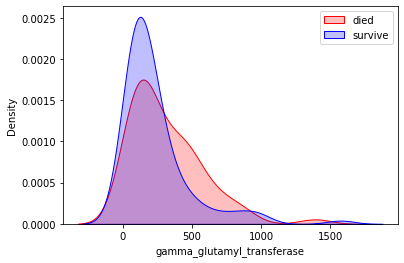

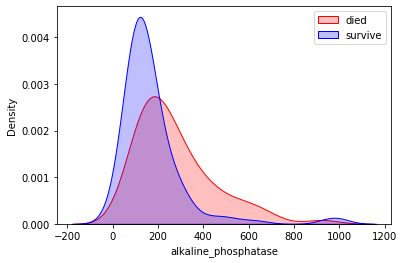

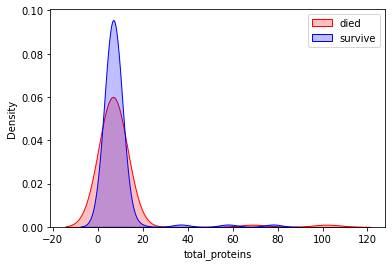

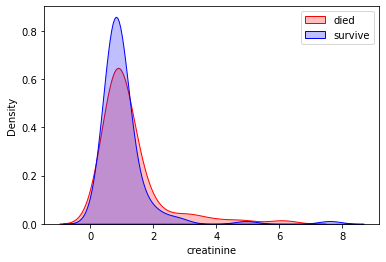

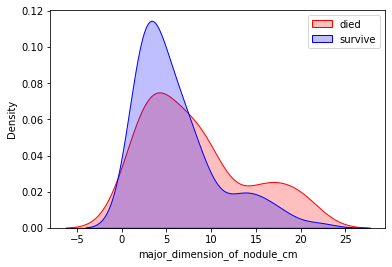

In [30]:
for column in numeric:
  ax = sns.kdeplot(df[df['survive'] == 0][column], color = 'red', shade = True )
  ax = sns.kdeplot(df[df['survive'] == 1][column], ax = ax, color = 'blue', shade = True )
  ax.legend(['died', 'survive'])
  plt.show()

In [31]:
#pd.crosstab(index = df['liver_metastasis'], columns = df['major_dimension_of_nodule_cm_cat']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar', cmap = 'seismic_r')
#plt.legend()

In [32]:
# Tratamiento de datos nulos para variables numericas
from sklearn.impute import KNNImputer

X_aux = df[numeric].values
X_trans = KNNImputer(n_neighbors = 3).fit_transform(X_aux)

df[numeric] = pd.DataFrame(X_trans, columns = numeric )

In [33]:
df[numeric].isnull().sum()

international_normalised_ratio    0
alpha-fetoprotein                 0
haemoglobin                       0
mean_corpuscular_volume           0
leukocytes                        0
platelets                         0
albumin                           0
total_bilirubin                   0
alanine_transaminase              0
aspartate_transaminase            0
gamma_glutamyl_transferase        0
alkaline_phosphatase              0
total_proteins                    0
creatinine                        0
major_dimension_of_nodule_cm      0
dtype: int64

In [34]:
for col in numeric:
  df[col] = df[col].fillna(df[col].mode()[0])

In [35]:
df[numeric].isnull().sum()

international_normalised_ratio    0
alpha-fetoprotein                 0
haemoglobin                       0
mean_corpuscular_volume           0
leukocytes                        0
platelets                         0
albumin                           0
total_bilirubin                   0
alanine_transaminase              0
aspartate_transaminase            0
gamma_glutamyl_transferase        0
alkaline_phosphatase              0
total_proteins                    0
creatinine                        0
major_dimension_of_nodule_cm      0
dtype: int64

#### Transformacion a categoricas de algunas variables numericas

In [36]:
df['gamma_glutamyl_transferase_cet'] = df['gamma_glutamyl_transferase'].apply(lambda x: 'little_gamma' if x <= 300 else 'much_gamma')

df['major_dimension_of_nodule_cm_cat'] = df['major_dimension_of_nodule_cm'].apply(lambda x: 'little_nodule' if x <= 7 else 'big_nodule')

df['alkaline_phosphatase_cet'] = df['alkaline_phosphatase'].apply(lambda x: 'little_alkaline' if x <= 200 else 'much_alkaline')

df['aspartate_transaminase_cat'] = df['aspartate_transaminase'].apply(lambda x: 'little_transa' if x <= 100 else 'much_transa')

df['alanine_transaminase_cat'] = df['alanine_transaminase'].apply(lambda x: 'little_alan' if x<= 100 else 'much_alan')

df['platelets_cat'] = df['platelets'].apply(lambda x: 'little_plat' if x <= 200000 else 'much_plat')

df['leukocytes_cat'] = df['leukocytes'].apply(lambda x: 'little_leu' if x <= 5000 else 'much_leu')

df['haemoglobin_cat'] = df['haemoglobin'].apply(lambda x: 'little_hea' if x <= 14. else 'big_hea' )

df['albumin_cat'] = df['albumin'].apply(lambda x: 'little_alb' if x <= 3.7 else 'big_alb')

In [37]:
def mean(x):
  if x <= 80:
    return 'mean<80'
  elif (x > 80) & (x <= 90):
    return 'mean_between_80_90'
  elif (x > 90) & (x <= 110):
    return 'mean_between_90_110'
  elif x > 110:
    return 'mean>110'

df['mean_corpuscular_volume_cat'] = df['mean_corpuscular_volume'].apply(mean)



In [38]:
# df['iron_cat'] = df['iron'].apply(lambda x: 'little_iron' if x <= 70 else 'big_iron')

In [39]:
# df['packs_of_cigarets_per_year_cat'] = df['packs_of_cigarets_per_year'].apply(lambda x: 'little_cig' if x <= 50 else 'too_much_cig')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   gender                            165 non-null    int64   
 1   symptoms                          165 non-null    float64 
 2   alcohol                           165 non-null    int64   
 3   hepatitis_b_surface_antigen       165 non-null    float64 
 4   hepatitis_b_e_antigen             165 non-null    float64 
 5   hepatitis_b_core_antibody         165 non-null    float64 
 6   hepatitis_c_virus_antibody        165 non-null    float64 
 7   cirrhosis                         165 non-null    int64   
 8   endemic_countries                 165 non-null    float64 
 9   smoking                           165 non-null    float64 
 10  diabetes                          165 non-null    float64 
 11  obesity                           165 non-null    float64 

# Missing Values

In [41]:
df.isna().sum()

gender                              0
symptoms                            0
alcohol                             0
hepatitis_b_surface_antigen         0
hepatitis_b_e_antigen               0
hepatitis_b_core_antibody           0
hepatitis_c_virus_antibody          0
cirrhosis                           0
endemic_countries                   0
smoking                             0
diabetes                            0
obesity                             0
hemochromatosis                     0
arterial_hypertension               0
chronic_renal_insufficiency         0
human_immunodeficiency_virus        0
nonalcoholic_steatohepatitis        0
splenomegaly                        0
portal_hypertension                 0
portal_vein_thrombosis              0
liver_metastasis                    0
radiological_hallmark               0
age                                 0
performance_status                  0
encephalopathy_degree               0
ascites_degree                      0
internationa

### Categorical

In [42]:
# for column in nominal:
#   # df[column] = df[column].fillna( df[column].value_counts().to_frame().reset_index().max()[0] )
#   df[column] = df[column].fillna(method = 'bfill')

In [43]:
# df.isna().sum()

# Dummies

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   gender                            165 non-null    int64   
 1   symptoms                          165 non-null    float64 
 2   alcohol                           165 non-null    int64   
 3   hepatitis_b_surface_antigen       165 non-null    float64 
 4   hepatitis_b_e_antigen             165 non-null    float64 
 5   hepatitis_b_core_antibody         165 non-null    float64 
 6   hepatitis_c_virus_antibody        165 non-null    float64 
 7   cirrhosis                         165 non-null    int64   
 8   endemic_countries                 165 non-null    float64 
 9   smoking                           165 non-null    float64 
 10  diabetes                          165 non-null    float64 
 11  obesity                           165 non-null    float64 

In [45]:
df_surv = pd.get_dummies(df)

In [46]:
df_surv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 78 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   gender                                           165 non-null    int64  
 1   symptoms                                         165 non-null    float64
 2   alcohol                                          165 non-null    int64  
 3   hepatitis_b_surface_antigen                      165 non-null    float64
 4   hepatitis_b_e_antigen                            165 non-null    float64
 5   hepatitis_b_core_antibody                        165 non-null    float64
 6   hepatitis_c_virus_antibody                       165 non-null    float64
 7   cirrhosis                                        165 non-null    int64  
 8   endemic_countries                                165 non-null    float64
 9   smoking                         

In [47]:
#corr = df_surv.corr()
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
#with sns.axes_style("white"):
#    f, ax = plt.subplots(figsize=(30, 30))
#    ax = sns.heatmap(corr, mask = mask, annot = True, square=True)
#    plt.show()

In [48]:
# Importando clasificadores a usar
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# importando metricas
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [49]:
class Classifier():
  def __init__(self, param_grid, modelo, n_features, threshold = 0.5, cv = 5, transformador = StandardScaler(), metrics = True, random_state = 42 ):
    self.size = df_surv.shape
    self.random_state = random_state
    self.cv = cv
    self.threshold = threshold
    self.param_grid = param_grid
    self.modelo = modelo
    self.n_features = n_features
    self.transformador = transformador
    self.metrics = metrics

    self.X = self.transformador.fit_transform( df_surv.drop('survive', axis = 1).values )
    self.y = df_surv['survive'].values

    self.col_seleccionadas = []
    self.best_params = {}

    self.y_pred = np.nan
    self.f1 = 0
    self.grid = np.nan

  def fit(self):
    # Oversampling
    print('\nEntrenando modelo ---> param_grid: {}, n_features: {}'.format( self.param_grid, self.n_features) )
    sms = SMOTE(random_state = self.random_state)
    X_res, y_res = sms.fit_resample( self.X , self.y)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = self.random_state, stratify = y_res)

    # Feature Selection
    select = RFE(RandomForestClassifier(random_state = self.random_state), n_features_to_select = self.n_features)
    select.fit(X_train, y_train)

    for i in range(X_train.shape[1]):
      if select.support_[i]:
        self.col_seleccionadas.append(df_surv.drop('survive', axis = 1).columns[i] )

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    # Grid Search
    self.grid = GridSearchCV(estimator = self.modelo, 
                             param_grid = self.param_grid, 
                             cv = self.cv, 
                             n_jobs = -1)

    self.grid.fit(X_train_rfe, y_train)

    self.best_params = self.grid.best_params_
    
    # Predict
    predicted_proba = self.grid.best_estimator_.predict_proba(X_test_rfe)
    self.y_pred = (predicted_proba [:, 1] >= self.threshold).astype('int')

    self.f1 = f1_score(y_test, self.y_pred)

    print('Modelo Entrenado!!! ----> f1_score: ', round( self.f1, 3) )

    if self.metrics:
      print(self.best_params)

      print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, self.y_pred)))
      print('f1-score  : {:.4f}'.format(f1_score(y_test, self.y_pred)))
      print('precision : {:.4f}'.format(precision_score(y_test, self.y_pred)))
      print('recall    : {:.4f}'.format(recall_score(y_test, self.y_pred)))
      print("\n",classification_report(y_test, self.y_pred))

      # Matriz de Confusión
      cf_matrix = confusion_matrix(y_test, self.y_pred)
      sns.heatmap( (cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.show()

      # Matriz de Confusión
      cf_matrix = confusion_matrix(y_test, self.y_pred)
      sns.heatmap( cf_matrix , annot = True, fmt=".2f", cmap="Blues")
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.show()

    


In [50]:
no_features = list( range(30, 60, 2) )
len( no_features )

15

In [51]:
class Pruebas():

  def __init__(self, modelo, param_grid, transformador, threshold = 0.5, no_features = no_features):
    self.modelo = modelo
    self.param_grid = param_grid
    self.transformador = transformador
    self.threshold = threshold
    self.no_features = no_features

    self.f1_scores = []

    self.columns_usadas = []

  def features(self):
    # Encontrando el número de features óptimo
    i = 1
    for num in self.no_features:
      print(str(i) + '-', end = '')

      clf = Classifier(param_grid = self.param_grid,
                      modelo = self.modelo,
                      n_features = num,
                      threshold = self.threshold,
                      cv = 5,
                      transformador = self.transformador,
                      metrics = False)

      clf.fit()
      self.f1_scores.append(clf.f1)
      i += 1

  
    print('\n f1_score maximo: {} no features: {}'.format(  max(self.f1_scores), self.no_features[self.f1_scores.index(max(self.f1_scores))] ) )
    plt.plot(self.no_features, self.f1_scores)
    plt.show()

  def mejor_modelo(self, threshold_definitivo ):
    # Entrenando el modelo con el número óptimo de features
    clf = Classifier(param_grid = self.param_grid,
                    modelo = self.modelo,
                    n_features = self.no_features[self.f1_scores.index(max(self.f1_scores))],
                    threshold = threshold_definitivo,
                    cv = 5,
                    transformador = self.transformador,
                    metrics = True)

    clf.fit()

    self.columns_usadas = clf.col_seleccionadas

    return clf.grid

# LogisticRegression

#### MinMax

1-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 30
Modelo Entrenado!!! ----> f1_score:  0.754
2-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 32
Modelo Entrenado!!! ----> f1_score:  0.78
3-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 34
Modelo Entrenado!!! ----> f1_score:  0.78
4-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 36
Modelo Entrenado!!! ----> f1_score:  0.78
5-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 38
Modelo Entrenado!!! ----> f1_score:  0.814
6-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 40
Modelo Entrenado!!! ----> f1_score:  0.814
7-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 42
Modelo Entrenado!!! ----> f1_score:  0.82
8-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 

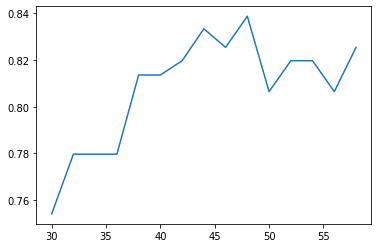

In [ ]:

param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}

prueba = Pruebas(modelo = LogisticRegression(),
                 param_grid = param_grid,
                 transformador = MinMaxScaler(),
                 threshold = 0.5, 
                 no_features = no_features)
prueba.features()




Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 48
Modelo Entrenado!!! ----> f1_score:  0.839
{'C': 0.001}
Accuracy Score: 0.8387
f1-score  : 0.8387
precision : 0.8387
recall    : 0.8387

               precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.84      0.84      0.84        31

    accuracy                           0.84        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.84      0.84      0.84        62



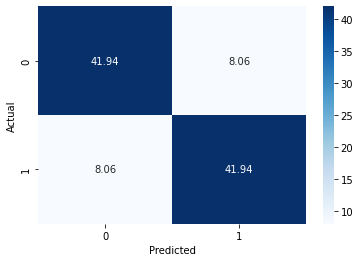

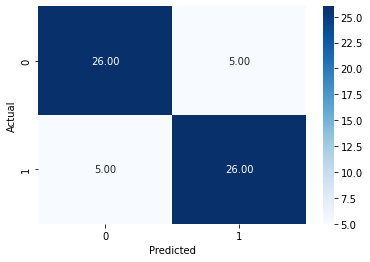

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1]})

In [ ]:
prueba.mejor_modelo(threshold_definitivo = 0.5)

#### StandardScaler

1-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 30
Modelo Entrenado!!! ----> f1_score:  0.814
2-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 32
Modelo Entrenado!!! ----> f1_score:  0.78
3-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 34
Modelo Entrenado!!! ----> f1_score:  0.8
4-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 36
Modelo Entrenado!!! ----> f1_score:  0.833
5-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 38
Modelo Entrenado!!! ----> f1_score:  0.806
6-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 40
Modelo Entrenado!!! ----> f1_score:  0.814
7-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 42
Modelo Entrenado!!! ----> f1_score:  0.814
8-
Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01,

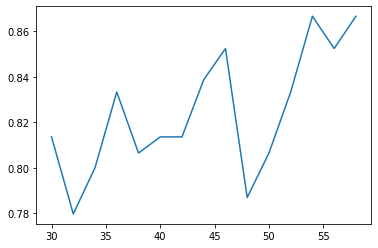

In [ ]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}

prueba = Pruebas(modelo = LogisticRegression(),
                 param_grid = param_grid,
                 transformador = StandardScaler(),
                 threshold = 0.5, 
                 no_features = no_features)
prueba.features()



Entrenando modelo ---> param_grid: {'C': [0.0001, 0.001, 0.01, 0.1, 1]}, n_features: 54
Modelo Entrenado!!! ----> f1_score:  0.867
{'C': 0.001}
Accuracy Score: 0.8710
f1-score  : 0.8667
precision : 0.8966
recall    : 0.8387

               precision    recall  f1-score   support

           0       0.85      0.90      0.88        31
           1       0.90      0.84      0.87        31

    accuracy                           0.87        62
   macro avg       0.87      0.87      0.87        62
weighted avg       0.87      0.87      0.87        62



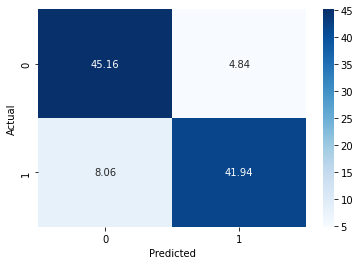

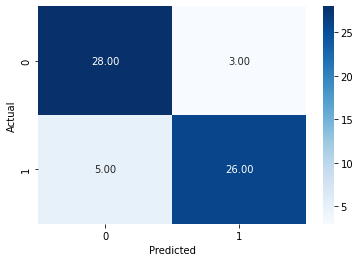

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1]})

In [ ]:
prueba.mejor_modelo(threshold_definitivo = 0.5)

# KNearest Neighbors

#### MinMax

1-
Entrenando modelo ---> param_grid: {'n_neighbors': [2, 3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, n_features: 30
Modelo Entrenado!!! ----> f1_score:  0.825
2-
Entrenando modelo ---> param_grid: {'n_neighbors': [2, 3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, n_features: 32
Modelo Entrenado!!! ----> f1_score:  0.833
3-
Entrenando modelo ---> param_grid: {'n_neighbors': [2, 3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, n_features: 34
Modelo Entrenado!!! ----> f1_score:  0.838
4-
Entrenando modelo ---> param_grid: {'n_neighbors': [2, 3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, n_features: 36
Modelo Entrenado!!! ----> f1_score:  0.867
5-
Entrenando modelo ---> param_grid: {'n_neighbors': [2, 3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, n_features: 38
Modelo Entrenado!!! ----> f1_score:  0.848
6-
En

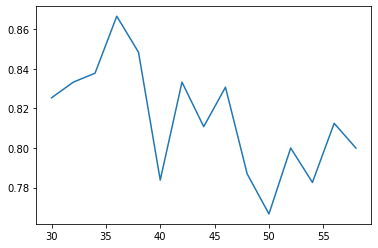

In [ ]:
param_grid = {'n_neighbors': [2, 3, 5, 7, 9],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]
              }

prueba = Pruebas(modelo = KNeighborsClassifier(),
                 param_grid = param_grid,
                 transformador = MinMaxScaler(),
                 threshold = 0.5, 
                 no_features = no_features)
prueba.features()



Entrenando modelo ---> param_grid: {'n_neighbors': [2, 3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, n_features: 36
Modelo Entrenado!!! ----> f1_score:  0.867
{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
Accuracy Score: 0.8710
f1-score  : 0.8667
precision : 0.8966
recall    : 0.8387

               precision    recall  f1-score   support

           0       0.85      0.90      0.88        31
           1       0.90      0.84      0.87        31

    accuracy                           0.87        62
   macro avg       0.87      0.87      0.87        62
weighted avg       0.87      0.87      0.87        62



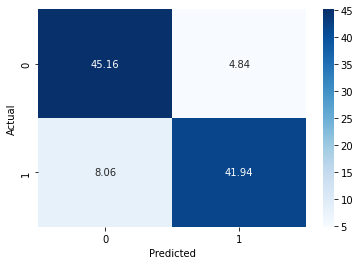

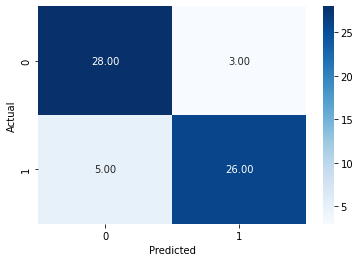

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 5, 7, 9], 'p': [1, 2]})

In [ ]:
prueba.mejor_modelo(threshold_definitivo = 0.6)

#### MinMax

1-
Entrenando modelo ---> param_grid: {'n_neighbors': [2, 3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, n_features: 30
Modelo Entrenado!!! ----> f1_score:  0.833
2-
Entrenando modelo ---> param_grid: {'n_neighbors': [2, 3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, n_features: 32
Modelo Entrenado!!! ----> f1_score:  0.833
3-
Entrenando modelo ---> param_grid: {'n_neighbors': [2, 3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, n_features: 34
Modelo Entrenado!!! ----> f1_score:  0.822
4-
Entrenando modelo ---> param_grid: {'n_neighbors': [2, 3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, n_features: 36
Modelo Entrenado!!! ----> f1_score:  0.788
5-
Entrenando modelo ---> param_grid: {'n_neighbors': [2, 3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, n_features: 38
Modelo Entrenado!!! ----> f1_score:  0.829
6-
En

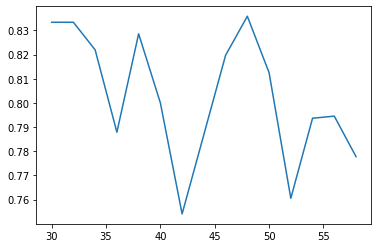

In [ ]:
param_grid = {'n_neighbors': [2, 3, 5, 7, 9],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]
              }

prueba = Pruebas(modelo = KNeighborsClassifier(),
                 param_grid = param_grid,
                 transformador = StandardScaler(),
                 threshold = 0.5, 
                 no_features = no_features)
prueba.features()



Entrenando modelo ---> param_grid: {'n_neighbors': [2, 3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}, n_features: 48
Modelo Entrenado!!! ----> f1_score:  0.847
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
Accuracy Score: 0.8548
f1-score  : 0.8475
precision : 0.8929
recall    : 0.8065

               precision    recall  f1-score   support

           0       0.82      0.90      0.86        31
           1       0.89      0.81      0.85        31

    accuracy                           0.85        62
   macro avg       0.86      0.85      0.85        62
weighted avg       0.86      0.85      0.85        62



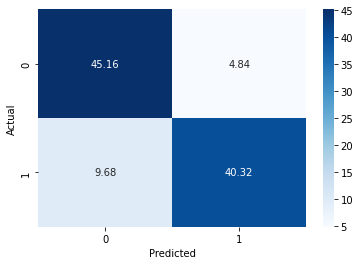

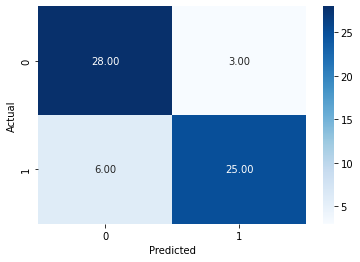

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 5, 7, 9], 'p': [1, 2]})

In [ ]:
prueba.mejor_modelo(threshold_definitivo = 0.7)

# SVC

#### MinMax

1-
Entrenando modelo ---> param_grid: {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'probability': [True]}, n_features: 30
Modelo Entrenado!!! ----> f1_score:  0.871
2-
Entrenando modelo ---> param_grid: {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'probability': [True]}, n_features: 32
Modelo Entrenado!!! ----> f1_score:  0.867
3-
Entrenando modelo ---> param_grid: {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'probability': [True]}, n_features: 34
Modelo Entrenado!!! ----> f1_score:  0.906
4-
Entrenando modelo ---> param_grid: {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 

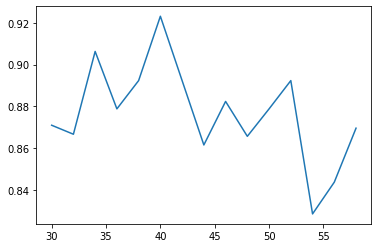

In [ ]:
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([0.001, 0.01, 0.1, 1, 10, 100])
gammas = list([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
probability = [True]

param_grid = dict(kernel=kernels, C=c, gamma=gammas, probability = probability)

prueba = Pruebas(modelo = SVC(),
                 param_grid = param_grid,
                 transformador = MinMaxScaler(),
                 threshold = 0.5, 
                 no_features = no_features)
prueba.features()



Entrenando modelo ---> param_grid: {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'probability': [True]}, n_features: 40
Modelo Entrenado!!! ----> f1_score:  0.9
{'C': 10, 'gamma': 0.5, 'kernel': 'rbf', 'probability': True}
Accuracy Score: 0.9032
f1-score  : 0.9000
precision : 0.9310
recall    : 0.8710

               precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.93      0.87      0.90        31

    accuracy                           0.90        62
   macro avg       0.90      0.90      0.90        62
weighted avg       0.90      0.90      0.90        62



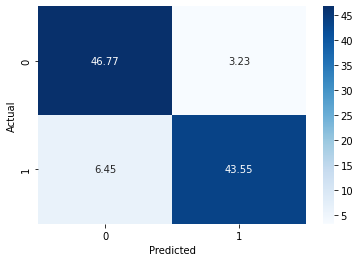

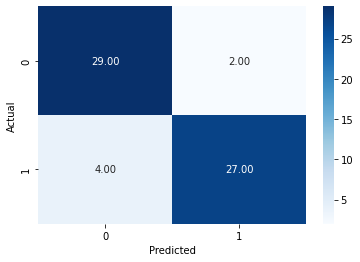

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'probability': [True]})

In [ ]:
prueba.mejor_modelo(threshold_definitivo = 0.6)

#### StandardScaler

1-
Entrenando modelo ---> param_grid: {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'probability': [True]}, n_features: 30
Modelo Entrenado!!! ----> f1_score:  0.857
2-
Entrenando modelo ---> param_grid: {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'probability': [True]}, n_features: 32
Modelo Entrenado!!! ----> f1_score:  0.857
3-
Entrenando modelo ---> param_grid: {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'probability': [True]}, n_features: 34
Modelo Entrenado!!! ----> f1_score:  0.82
4-
Entrenando modelo ---> param_grid: {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0

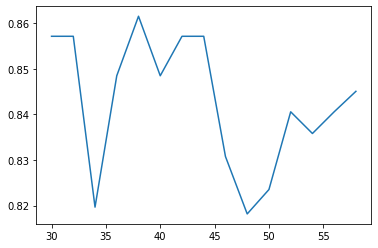

In [ ]:
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([0.001, 0.01, 0.1, 1, 10, 100])
gammas = list([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
probability = [True]

param_grid = dict(kernel=kernels, C=c, gamma=gammas, probability = probability)

prueba = Pruebas(modelo = SVC(),
                 param_grid = param_grid,
                 transformador = StandardScaler(),
                 threshold = 0.5, 
                 no_features = no_features)
prueba.features()



Entrenando modelo ---> param_grid: {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'probability': [True]}, n_features: 38
Modelo Entrenado!!! ----> f1_score:  0.867
{'C': 0.01, 'gamma': 0.4, 'kernel': 'poly', 'probability': True}
Accuracy Score: 0.8710
f1-score  : 0.8667
precision : 0.8966
recall    : 0.8387

               precision    recall  f1-score   support

           0       0.85      0.90      0.88        31
           1       0.90      0.84      0.87        31

    accuracy                           0.87        62
   macro avg       0.87      0.87      0.87        62
weighted avg       0.87      0.87      0.87        62



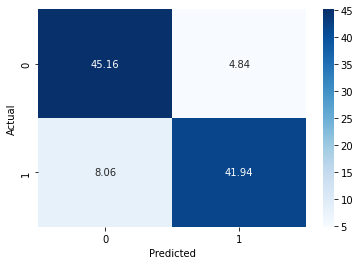

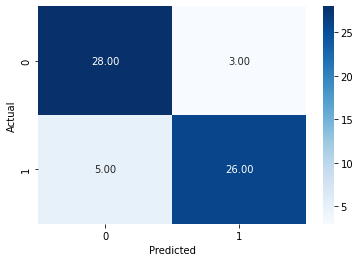

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'probability': [True]})

In [ ]:
prueba.mejor_modelo(threshold_definitivo = 0.6)

# Gaussian NB

#### MinMax

1-
Entrenando modelo ---> param_grid: {}, n_features: 30
Modelo Entrenado!!! ----> f1_score:  0.689
2-
Entrenando modelo ---> param_grid: {}, n_features: 32
Modelo Entrenado!!! ----> f1_score:  0.762
3-
Entrenando modelo ---> param_grid: {}, n_features: 34
Modelo Entrenado!!! ----> f1_score:  0.762
4-
Entrenando modelo ---> param_grid: {}, n_features: 36
Modelo Entrenado!!! ----> f1_score:  0.781
5-
Entrenando modelo ---> param_grid: {}, n_features: 38
Modelo Entrenado!!! ----> f1_score:  0.781
6-
Entrenando modelo ---> param_grid: {}, n_features: 40
Modelo Entrenado!!! ----> f1_score:  0.762
7-
Entrenando modelo ---> param_grid: {}, n_features: 42
Modelo Entrenado!!! ----> f1_score:  0.762
8-
Entrenando modelo ---> param_grid: {}, n_features: 44
Modelo Entrenado!!! ----> f1_score:  0.781
9-
Entrenando modelo ---> param_grid: {}, n_features: 46
Modelo Entrenado!!! ----> f1_score:  0.762
10-
Entrenando modelo ---> param_grid: {}, n_features: 48
Modelo Entrenado!!! ----> f1_score:  0.742

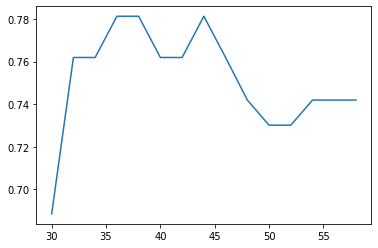

In [ ]:
param_grid = {}

prueba = Pruebas(modelo = GaussianNB(),
                 param_grid = param_grid,
                 transformador = MinMaxScaler(),
                 threshold = 0.5, 
                 no_features = no_features)
prueba.features()


Entrenando modelo ---> param_grid: {}, n_features: 34
Modelo Entrenado!!! ----> f1_score:  0.8
{}
Accuracy Score: 0.8033
f1-score  : 0.8000
precision : 0.8000
recall    : 0.8000

               precision    recall  f1-score   support

           0       0.81      0.81      0.81        31
           1       0.80      0.80      0.80        30

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



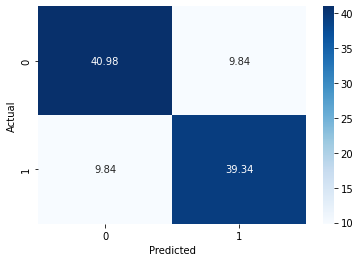

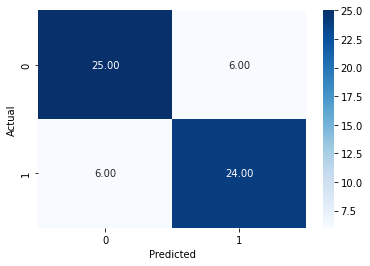

In [ ]:
prueba.mejor_modelo(threshold_definitivo = 0.6)

#### StandardScaler

1-
Entrenando modelo ---> param_grid: {}, n_features: 30
Modelo Entrenado!!! ----> f1_score:  0.733
2-
Entrenando modelo ---> param_grid: {}, n_features: 32
Modelo Entrenado!!! ----> f1_score:  0.774
3-
Entrenando modelo ---> param_grid: {}, n_features: 34
Modelo Entrenado!!! ----> f1_score:  0.774
4-
Entrenando modelo ---> param_grid: {}, n_features: 36
Modelo Entrenado!!! ----> f1_score:  0.754
5-
Entrenando modelo ---> param_grid: {}, n_features: 38
Modelo Entrenado!!! ----> f1_score:  0.742
6-
Entrenando modelo ---> param_grid: {}, n_features: 40
Modelo Entrenado!!! ----> f1_score:  0.754
7-
Entrenando modelo ---> param_grid: {}, n_features: 42
Modelo Entrenado!!! ----> f1_score:  0.754
8-
Entrenando modelo ---> param_grid: {}, n_features: 44
Modelo Entrenado!!! ----> f1_score:  0.733
9-
Entrenando modelo ---> param_grid: {}, n_features: 46
Modelo Entrenado!!! ----> f1_score:  0.733
10-
Entrenando modelo ---> param_grid: {}, n_features: 48
Modelo Entrenado!!! ----> f1_score:  0.754

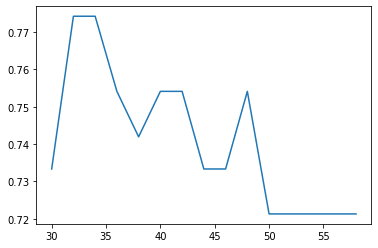

In [ ]:
param_grid = {}

prueba = Pruebas(modelo = GaussianNB(),
                 param_grid = param_grid,
                 transformador = StandardScaler(),
                 threshold = 0.5, 
                 no_features = no_features)
prueba.features()


Entrenando modelo ---> param_grid: {}, n_features: 32
Modelo Entrenado!!! ----> f1_score:  0.733
{}
Accuracy Score: 0.7419
f1-score  : 0.7333
precision : 0.7586
recall    : 0.7097

               precision    recall  f1-score   support

           0       0.73      0.77      0.75        31
           1       0.76      0.71      0.73        31

    accuracy                           0.74        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.74      0.74      0.74        62



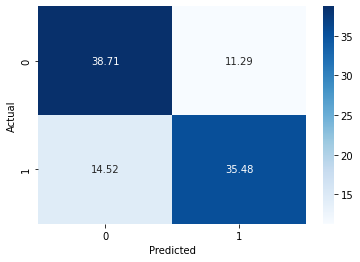

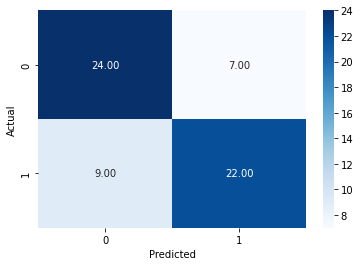

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1, param_grid={})

In [ ]:
prueba.mejor_modelo(threshold_definitivo = 0.6)

# RandomForest

#### MinMax

In [ ]:
param_grid = {"criterion": ["entropy", "gini"], 
              # "max_depth": [2, 4, 6, 10],
              "min_samples_leaf": [1, 2, 4, 8, 10],
              #"max_features": ["auto", "sqrt"],
              "n_estimators": [10, 20, 100, 200],
              'oob_score': [True]}

prueba = Pruebas(modelo = RandomForestClassifier(),
                 param_grid = param_grid,
                 transformador = MinMaxScaler(),
                 threshold = 0.5, 
                 no_features = no_features)
prueba.features()


1-
Entrenando modelo ---> param_grid: {'criterion': ['entropy', 'gini'], 'min_samples_leaf': [1, 2, 4, 8, 10], 'n_estimators': [10, 20, 100, 200], 'oob_score': [True]}, n_features: 30
Modelo Entrenado!!! ----> f1_score:  0.833
2-
Entrenando modelo ---> param_grid: {'criterion': ['entropy', 'gini'], 'min_samples_leaf': [1, 2, 4, 8, 10], 'n_estimators': [10, 20, 100, 200], 'oob_score': [True]}, n_features: 32
Modelo Entrenado!!! ----> f1_score:  0.852
3-
Entrenando modelo ---> param_grid: {'criterion': ['entropy', 'gini'], 'min_samples_leaf': [1, 2, 4, 8, 10], 'n_estimators': [10, 20, 100, 200], 'oob_score': [True]}, n_features: 34
Modelo Entrenado!!! ----> f1_score:  0.871
4-
Entrenando modelo ---> param_grid: {'criterion': ['entropy', 'gini'], 'min_samples_leaf': [1, 2, 4, 8, 10], 'n_estimators': [10, 20, 100, 200], 'oob_score': [True]}, n_features: 36
Modelo Entrenado!!! ----> f1_score:  0.839
5-
Entrenando modelo ---> param_grid: {'criterion': ['entropy', 'gini'], 'min_samples_leaf':

KeyboardInterrupt: ignored


Entrenando modelo ---> param_grid: {'criterion': ['entropy', 'gini'], 'min_samples_leaf': [4, 8, 10], 'n_estimators': [10, 20, 100, 200], 'oob_score': [True]}, n_features: 56
Modelo Entrenado!!! ----> f1_score:  0.636
{'criterion': 'gini', 'min_samples_leaf': 4, 'n_estimators': 100, 'oob_score': True}
Accuracy Score: 0.7377
f1-score  : 0.6364
precision : 1.0000
recall    : 0.4667

               precision    recall  f1-score   support

           0       0.66      1.00      0.79        31
           1       1.00      0.47      0.64        30

    accuracy                           0.74        61
   macro avg       0.83      0.73      0.72        61
weighted avg       0.83      0.74      0.72        61



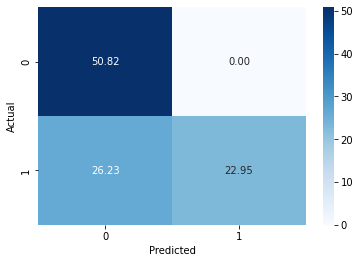

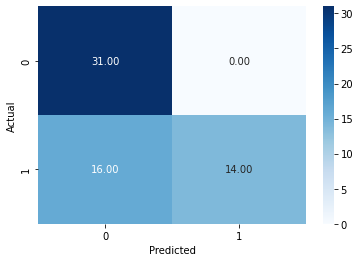

In [ ]:
prueba.mejor_modelo(threshold_definitivo = 0.6)

#### StandardScaler

In [ ]:
param_grid = {"criterion": ["entropy", "gini"], 
              # "max_depth": [2, 4, 6, 10],
              "min_samples_leaf": [1, 2, 4, 8, 10],
              #"max_features": ["auto", "sqrt"],
              "n_estimators": [10, 20, 100, 200],
              'oob_score': [True]}

prueba = Pruebas(modelo = RandomForestClassifier(),
                 param_grid = param_grid,
                 transformador = StandardScaler(),
                 threshold = 0.5, 
                 no_features = no_features)
prueba.features()

1-
Entrenando modelo ---> param_grid: {'criterion': ['entropy', 'gini'], 'min_samples_leaf': [1, 2, 4, 8, 10], 'n_estimators': [10, 20, 100, 200], 'oob_score': [True]}, n_features: 30
Modelo Entrenado!!! ----> f1_score:  0.788
2-
Entrenando modelo ---> param_grid: {'criterion': ['entropy', 'gini'], 'min_samples_leaf': [1, 2, 4, 8, 10], 'n_estimators': [10, 20, 100, 200], 'oob_score': [True]}, n_features: 32


KeyboardInterrupt: ignored


Entrenando modelo ---> param_grid: {'criterion': ['entropy', 'gini'], 'min_samples_leaf': [1, 2, 4, 8, 10], 'n_estimators': [10, 20, 100, 200], 'oob_score': [True]}, n_features: 40
Modelo Entrenado!!! ----> f1_score:  0.679
{'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 20, 'oob_score': True}
Accuracy Score: 0.7049
f1-score  : 0.6786
precision : 0.7308
recall    : 0.6333

               precision    recall  f1-score   support

           0       0.69      0.77      0.73        31
           1       0.73      0.63      0.68        30

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



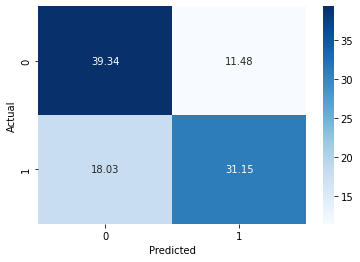

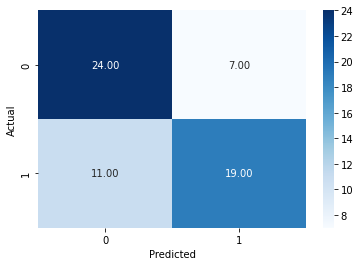

In [ ]:
prueba.mejor_modelo(threshold_definitivo = 0.5)

# Gradient Boosting

#### MinMax

In [ ]:

param_grid = { 
              # "max_depth": [2,4,6, 10, 20, 50],
              "min_samples_leaf": [1, 2, 4, 8, 10],
              # "max_features": ["auto", "sqrt"],
              "n_estimators": [10, 20, 100, 200],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
              'loss': ['deviance', 'exponential']
              }


prueba = Pruebas(modelo = GradientBoostingClassifier(),
                 param_grid = param_grid,
                 transformador = MinMaxScaler(),
                 threshold = 0.5, 
                 no_features = no_features)
prueba.features()


1-
Entrenando modelo ---> param_grid: {'min_samples_leaf': [1, 2, 4, 8, 10], 'n_estimators': [10, 20, 100, 200], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1], 'loss': ['deviance', 'exponential']}, n_features: 30


KeyboardInterrupt: ignored


Entrenando modelo ---> param_grid: {'min_samples_leaf': [1, 2, 4, 8, 10], 'n_estimators': [10, 20, 100, 200], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1], 'loss': ['deviance', 'exponential']}, n_features: 52
Modelo Entrenado!!! ----> f1_score:  0.78
{'learning_rate': 0.001, 'loss': 'deviance', 'min_samples_leaf': 10, 'n_estimators': 200}
Accuracy Score: 0.7869
f1-score  : 0.7797
precision : 0.7931
recall    : 0.7667

               precision    recall  f1-score   support

           0       0.78      0.81      0.79        31
           1       0.79      0.77      0.78        30

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



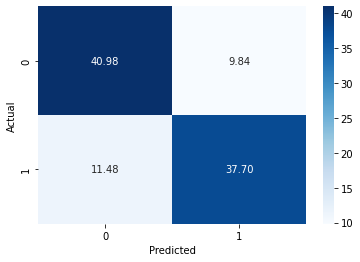

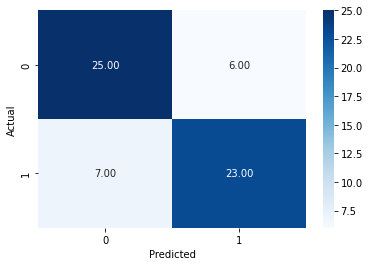

In [ ]:
prueba.mejor_modelo(threshold_definitivo = 0.5)

#### StandardScaler

In [ ]:

param_grid = { 
              # "max_depth": [2,4,6, 10, 20, 50],
              "min_samples_leaf": [1, 2, 4, 8, 10],
              # "max_features": ["auto", "sqrt"],
              "n_estimators": [10, 20, 100, 200],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
              'loss': ['deviance', 'exponential']
              }


prueba = Pruebas(modelo = GradientBoostingClassifier(),
                 param_grid = param_grid,
                 transformador = StandardScaler(),
                 threshold = 0.5, 
                 no_features = no_features)
prueba.features()


In [ ]:
prueba.mejor_modelo(threshold_definitivo = 0.5)

# Mejor modelo

1-
Entrenando modelo ---> param_grid: {'C': [10], 'gamma': [0.5], 'kernel': ['rbf'], 'probability': [True]}, n_features: 40
Modelo Entrenado!!! ----> f1_score:  0.909

 f1_score maximo: 0.909090909090909 no features: 40


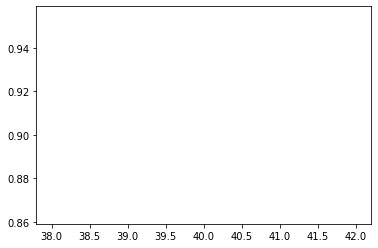

In [52]:
param_grid = {'C': [10], 'gamma': [0.5], 'kernel': ['rbf'], 'probability': [True]}


prueba = Pruebas(modelo = SVC(),
                 param_grid = param_grid,
                 transformador = MinMaxScaler(),
                 threshold = 0.5, 
                 no_features = [40])
prueba.features()



Entrenando modelo ---> param_grid: {'C': [10], 'gamma': [0.5], 'kernel': ['rbf'], 'probability': [True]}, n_features: 40
Modelo Entrenado!!! ----> f1_score:  0.9
{'C': 10, 'gamma': 0.5, 'kernel': 'rbf', 'probability': True}
Accuracy Score: 0.9032
f1-score  : 0.9000
precision : 0.9310
recall    : 0.8710

               precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.93      0.87      0.90        31

    accuracy                           0.90        62
   macro avg       0.90      0.90      0.90        62
weighted avg       0.90      0.90      0.90        62



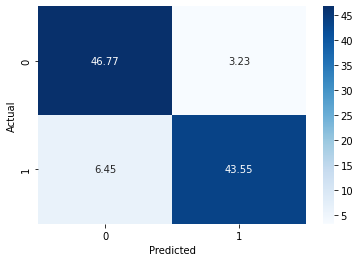

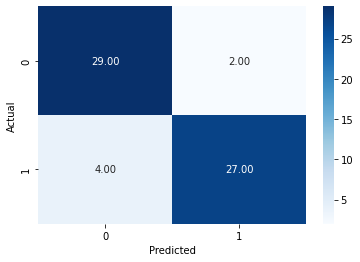

In [53]:
clf1 = prueba.mejor_modelo(threshold_definitivo = 0.6)

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 21.9 MB/s 


In [54]:
X = MinMaxScaler().fit_transform( df_surv.drop('survive', axis = 1).values )
y = df_surv['survive']

sms = SMOTE(random_state = 42)
X_res, y_res = sms.fit_resample( X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 42, stratify = y_res)

In [55]:
 # Feature Selection
select = RFE(RandomForestClassifier(random_state = 42), n_features_to_select = 40)
select.fit(X_train, y_train)

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

In [56]:
clf = clf1.best_estimator_
clf.fit(X_train_rfe, y_train)
clf.score(X_test_rfe, y_test)

0.9193548387096774

In [ ]:
predicted_proba = clf.predict_proba(X_test_rfe)
y_pred = (predicted_proba [:, 1] >= 0.6).astype('int')
precision_score(y_test, y_pred)

0.9032258064516129

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
def plot_precision_recall(model, y_test, X_test):
    precision, recall, thresholds = precision_recall_curve(y_test, 
                                                      model.decision_function(X_test))
    # encontrar el threshold más cercano a 0
    close_zero = np.argmin(np.abs(thresholds - 0.4))
    plt.plot(precision[close_zero], recall[close_zero], "o", 
            markersize=10, label="threshold zero", fillstyle="none",
            c="k", mew=2)
    plt.plot(precision,recall, label="precision recall curve")
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.legend(loc="best")
    plt.show()

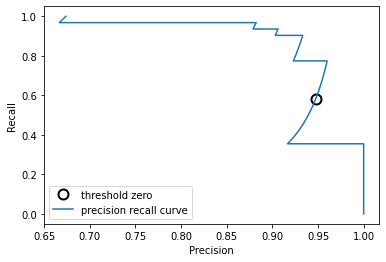

In [ ]:
plot_precision_recall(clf, y_test, X_test_rfe)

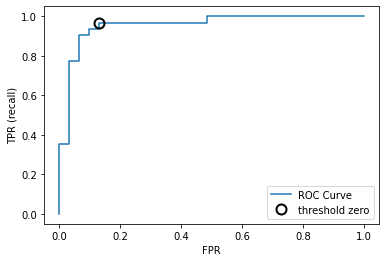

In [58]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(X_test_rfe))

plt.plot(fpr,tpr,label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize=10,
         label="threshold zero", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

In [57]:
from sklearn.metrics import average_precision_score

ap = average_precision_score(y_test, clf.decision_function(X_test_rfe))
print("Average precision del svc: ", ap)

Average precision del svc:  0.9506010856677809


# Cross-Validation

In [ ]:
clf

SVC(C=10, gamma=0.5, probability=True)

In [ ]:
X_train_rfe.shape

(142, 40)

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

kfold = StratifiedKFold(n_splits = 10, shuffle = True, 
                        random_state = 42)


In [ ]:
scores = []

for k, (train, test) in enumerate(kfold.split(X_train_rfe, y_train)):
    clf.fit(X_train_rfe[train], y_train.iloc[train])

    predicted_proba = clf.predict_proba(X_train_rfe[test])
    y_pred = (predicted_proba[:, 1] >= 0.5).astype('int')
    

    score = accuracy_score(y_train.iloc[test], y_pred )
    scores.append(score)
    
    print("Fold #{}, Tamaño:{}, f1:{}".format(k + 1, 
                                           np.bincount(y_train.iloc[train]), 
                                               score))
    
print("\nMean Acc: {} +/- {}".format(np.mean(scores), np.std(scores)))

Fold #1, Tamaño:[63 64], f1:0.7333333333333333
Fold #2, Tamaño:[64 63], f1:0.8
Fold #3, Tamaño:[64 64], f1:1.0
Fold #4, Tamaño:[64 64], f1:0.8571428571428571
Fold #5, Tamaño:[64 64], f1:0.9285714285714286
Fold #6, Tamaño:[64 64], f1:0.8571428571428571
Fold #7, Tamaño:[64 64], f1:0.7142857142857143
Fold #8, Tamaño:[64 64], f1:0.7857142857142857
Fold #9, Tamaño:[64 64], f1:0.5714285714285714
Fold #10, Tamaño:[64 64], f1:1.0

Mean Acc: 0.8247619047619047 +/- 0.1269527739071545


In [ ]:
scores = []

for k, (train, test) in enumerate(kfold.split(X_train_rfe, y_train)):
    clf.fit(X_train_rfe[train], y_train.iloc[train])

    predicted_proba = clf.predict_proba(X_train_rfe[test])
    y_pred = (predicted_proba[:, 1] >= 0.5).astype('int')
    

    score = f1_score(y_train.iloc[test], y_pred )
    scores.append(score)
    
    print("Fold #{}, Tamaño:{}, f1:{}".format(k + 1, 
                                           np.bincount(y_train.iloc[train]), 
                                               score))
    
print("\nMean Acc f1: {} +/- {}".format(np.mean(scores), np.std(scores)))


Fold #1, Tamaño:[63 64], f1:0.7272727272727273
Fold #2, Tamaño:[64 63], f1:0.823529411764706
Fold #3, Tamaño:[64 64], f1:1.0
Fold #4, Tamaño:[64 64], f1:0.8333333333333333
Fold #5, Tamaño:[64 64], f1:0.8750000000000001
Fold #6, Tamaño:[64 64], f1:0.8571428571428571
Fold #7, Tamaño:[64 64], f1:0.75
Fold #8, Tamaño:[64 64], f1:0.7692307692307692
Fold #9, Tamaño:[64 64], f1:0.6250000000000001
Fold #10, Tamaño:[64 64], f1:1.0

Mean Acc f1: 0.8260509098744393 +/- 0.11096375676731969


In [ ]:
scores = []

for k, (train, test) in enumerate(kfold.split(X_train_rfe, y_train)):
    clf.fit(X_train_rfe[train], y_train.iloc[train])

    predicted_proba = clf.predict_proba(X_train_rfe[test])
    y_pred = (predicted_proba[:, 1] >= 0.5).astype('int')
    

    score = precision_score(y_train.iloc[test], y_pred )
    scores.append(score)
    
    print("Fold #{}, Tamaño:{}, Precision:{}".format(k + 1, 
                                           np.bincount(y_train.iloc[train]), 
                                               score))
    
print("\nMean Acc precision: {} +/- {}".format(np.mean(scores), np.std(scores)))


Fold #1, Tamaño:[63 64], Precision:1.0
Fold #2, Tamaño:[64 63], Precision:0.7777777777777778
Fold #3, Tamaño:[64 64], Precision:1.0
Fold #4, Tamaño:[64 64], Precision:1.0
Fold #5, Tamaño:[64 64], Precision:0.7777777777777778
Fold #6, Tamaño:[64 64], Precision:0.8571428571428571
Fold #7, Tamaño:[64 64], Precision:0.6666666666666666
Fold #8, Tamaño:[64 64], Precision:0.8333333333333334
Fold #9, Tamaño:[64 64], Precision:0.5555555555555556
Fold #10, Tamaño:[64 64], Precision:1.0

Mean Acc precision: 0.8468253968253968 +/- 0.14865017923753734


In [ ]:
scores = []

for k, (train, test) in enumerate(kfold.split(X_train_rfe, y_train)):
    clf.fit(X_train_rfe[train], y_train.iloc[train])

    predicted_proba = clf.predict_proba(X_train_rfe[test])
    y_pred = (predicted_proba[:, 1] >= 0.5).astype('int')
    

    score = recall_score(y_train.iloc[test], y_pred )
    scores.append(score)
    
    print("Fold #{}, Tamaño:{}, Recall:{}".format(k + 1, 
                                           np.bincount(y_train.iloc[train]), 
                                               score))

print("Mean Acc recall: {} +/- {}".format(np.mean(scores), np.std(scores)))


Fold #1, Tamaño:[63 64], Recall:0.5714285714285714
Fold #2, Tamaño:[64 63], Recall:0.875
Fold #3, Tamaño:[64 64], Recall:1.0
Fold #4, Tamaño:[64 64], Recall:0.7142857142857143
Fold #5, Tamaño:[64 64], Recall:1.0
Fold #6, Tamaño:[64 64], Recall:0.7142857142857143
Fold #7, Tamaño:[64 64], Recall:0.8571428571428571
Fold #8, Tamaño:[64 64], Recall:0.7142857142857143
Fold #9, Tamaño:[64 64], Recall:0.7142857142857143
Fold #10, Tamaño:[64 64], Recall:1.0
Mean Acc recall: 0.8160714285714284 +/- 0.14420126595158872


# Learning Curve

In [ ]:
clf

SVC(C=10, gamma=0.5, probability=True)

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = clf, 
                                                        X = X_train_rfe,
                                                        y = y_train,
                                                        train_sizes = np.linspace(0.1,1,10),
                                                        cv = 7,
                                                        n_jobs = -1,
                                                        verbose = 4,
                                                        scoring = 'precision')

[learning_curve] Training set sizes: [ 12  24  36  48  60  72  84  96 108 121]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of  18 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.8s finished


In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

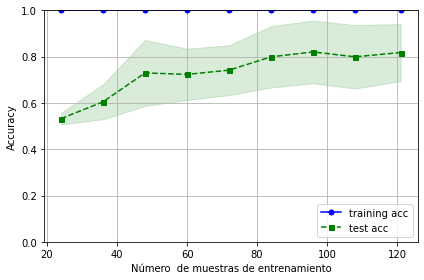

In [ ]:
plt.plot(train_sizes, train_mean, color="blue", marker="o",
         markersize=5, label="training acc")

plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std,
                alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color="green", linestyle="--", marker="s",
         markersize=5, label="test acc")

plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std,
                alpha=0.15, color="green")

plt.grid()
plt.xlabel("Número  de muestras de entrenamiento")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.,1.0])
plt.tight_layout()
plt.show()

# Sanity check

In [ ]:
# sanity check
scores = [] 
for i in range(0, 1000): 
  
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3) 

    select.fit(X_train, y_train)
    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    clf1 = clf
    clf1.fit(X_train_rfe, y_train)
    scores.append(f1_score( y_test, clf1.predict(X_test_rfe))) 

plt.hist(scores)
plt.show()

KeyboardInterrupt: ignored

# Model Explanation

In [ ]:
import shap
shap.initjs()
clf = clf1.best_estimator_

explainer = shap.KernelExplainer(clf.predict_proba, X_train_rfe)


Using 142 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
explainer.expected_value

array([0.49862701, 0.50137299])

In [ ]:
col_seleccionadas = []
for i in range(X_train.shape[1]):
      if select.support_[i]:
        col_seleccionadas.append(df_surv.drop('survive', axis = 1).columns[i] )


In [ ]:
numeric_sele = []
for col in numeric:
  if col in col_seleccionadas:
    numeric_sele.append(col)
numeric_sele

['international_normalised_ratio',
 'alpha-fetoprotein',
 'haemoglobin',
 'mean_corpuscular_volume',
 'leukocytes',
 'platelets',
 'albumin',
 'total_bilirubin',
 'alanine_transaminase',
 'aspartate_transaminase',
 'gamma_glutamyl_transferase',
 'alkaline_phosphatase',
 'total_proteins',
 'creatinine',
 'major_dimension_of_nodule_cm']

In [ ]:
sample_train = pd.DataFrame(X_train_rfe, columns = col_seleccionadas)

In [ ]:
shap_values = explainer.shap_values(sample_train)

  0%|          | 0/142 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

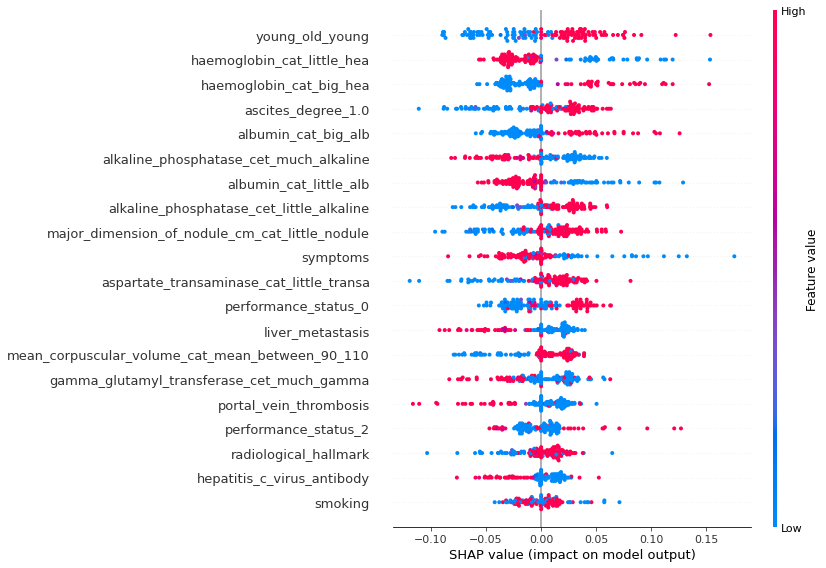

In [ ]:
shap.summary_plot(shap_values[1], sample_train)

In [ ]:
sample = pd.DataFrame(X_test_rfe, columns = col_seleccionadas)


In [ ]:
shap_values = explainer.shap_values(sample)

  0%|          | 0/62 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

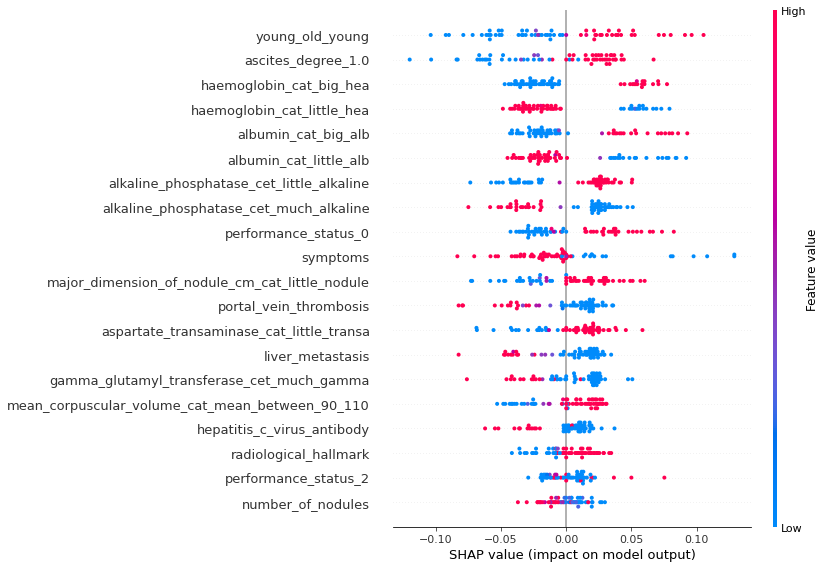

In [ ]:
shap.summary_plot(shap_values[1], sample)